<a href="https://colab.research.google.com/github/shayar/ProblemSolvingwithDataScience/blob/KNNpred/CancerPredictionWithKNN/KNN_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brsahan/genomic-data-for-cancer")

print("Path to dataset files:", path)

100%|██████████| 8.92k/8.92k [00:00<00:00, 14.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/brsahan/genomic-data-for-cancer/versions/1


---

# Data acquisition

In [2]:
import pandas as pd
df = pd.read_csv(path + "/gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


---

# Importing other important libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

---

# Data cleaning and pre processing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


Total entries are 3000, and there are no missing values

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


Looking at the description it seems like this dataset does not have outliers. But we'll check with a box plot too.

<Axes: >

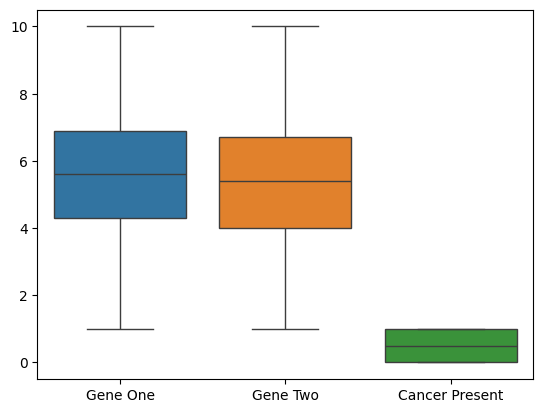

In [6]:
sns.boxplot(data=df)

No outliers.

In [7]:
df['Cancer Present'].value_counts()

,count
Cancer Present,
1,1500
0,1500


It is a balanced dataset and there is no value apart from 0 and 1 in this column.

# Exploratory Data Analysis (EDA)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

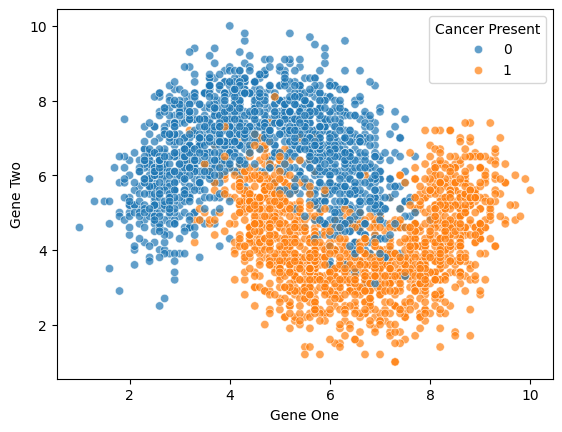

In [8]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.7)

Most of the data looks segregated, with some overlap in the middle. Forming a crescent like structure.

Cancer seems to be present when gen 1 has moderate to high value and gene 2 has low to moderate value


<Axes: xlabel='Cancer Present', ylabel='Gene One'>

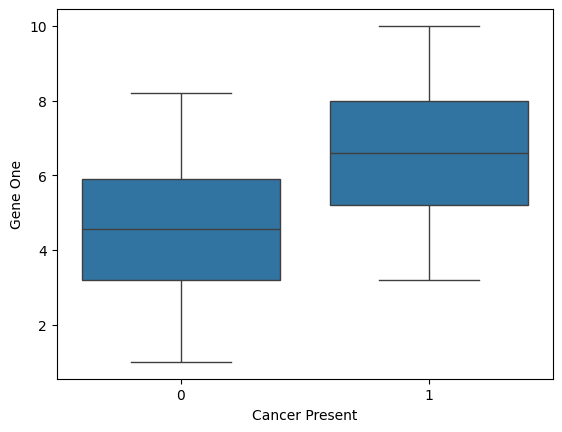

In [9]:
sns.boxplot(data=df, x='Cancer Present', y='Gene One')

<Axes: xlabel='Cancer Present', ylabel='Gene Two'>

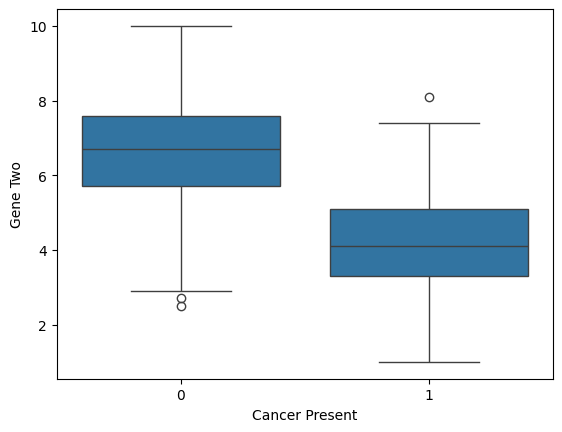

In [10]:
sns.boxplot(data=df, x='Cancer Present', y='Gene Two')

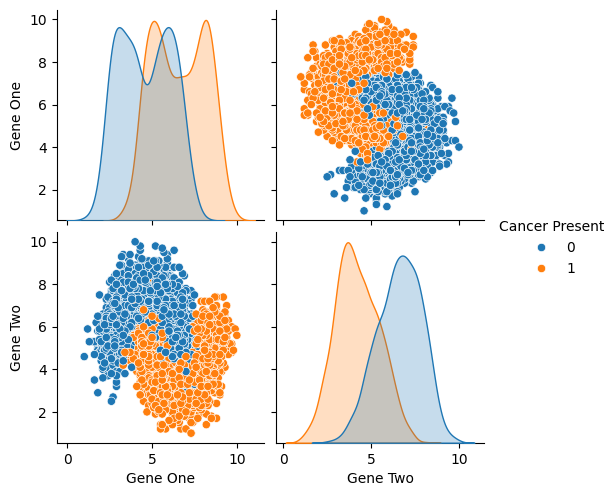

In [11]:
sns.pairplot(df, hue='Cancer Present')

This confirms what we thought. Then we observe that gene 1 is not fully reliable as it has a lot of overlap like the crown like intersecting figue we see in top left corner. Gene 2 on the other hand has a clear separation among cancer and non cancer as seen is bottom right where cancer present (orange) is higher when gen 2 is lower.

<Axes: xlabel='Gene Two', ylabel='Count'>

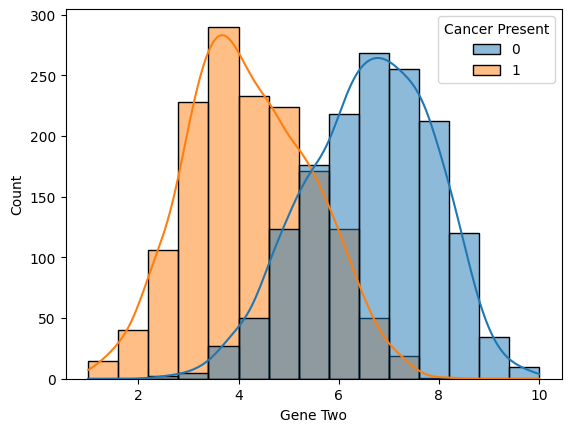

In [12]:
sns.histplot(data=df, x='Gene Two', hue='Cancer Present', kde=True, bins=15)

Lets see how well the gens corelate with each other and cancer present.

<Axes: >

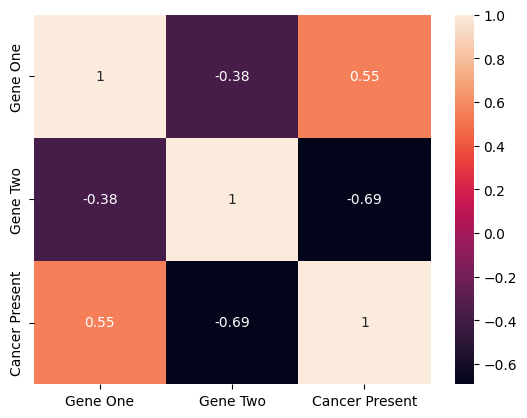

In [13]:
sns.heatmap(df.corr(), annot=True)

The heat map suggests Gen 1 has a moderate positive correlation and gen 2 has a strong negative correlation with cancer present.

---

# Model training

In [14]:
# makeing a copy of our data before proceeding
df2 = df.copy()

In [15]:
X = df2.drop('Cancer Present', axis=1)
y = df2['Cancer Present']

In [16]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# standardizing our splits
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# fitting
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# making a prediction
y_pred = knn.predict(X_test)

In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[306,  22],
       [ 26, 246]])

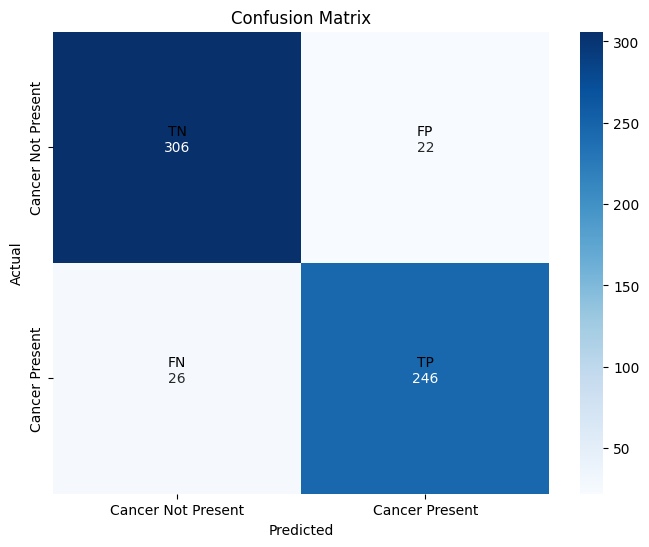

In [21]:
# prompt: make a heatmap for my confusion metrix and lables should have TP, FN, TN, FP, cancer present and cancer not present

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cancer Not Present', 'Cancer Present'], yticklabels=['Cancer Not Present', 'Cancer Present'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add custom labels for TP, FN, TN, FP
# The confusion matrix structure is:
# [[TN, FP],
#  [FN, TP]]

plt.text(0.5, 0.5, f'TN\n\n', ha='center', va='center', color='black')
plt.text(1.5, 0.5, f'FP\n\n', ha='center', va='center', color='black')
plt.text(0.5, 1.5, f'FN\n\n', ha='center', va='center', color='black')
plt.text(1.5, 1.5, f'TP\n\n', ha='center', va='center', color='black')

plt.show()

In [22]:
# accuracy, recall, precision and f1 score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.92
Recall: 0.9044117647058824
Precision: 0.917910447761194
F1 score: 0.9111111111111111


## Results and interpretations
From the confusion matrix we found 246 true positives (cancer present), 306 true negatives(cancer absent), 22 false positive (mistook for cancer), 36 false negative (could not detect cancer).


Recall is important for this model as it measures the proportion of actual cancer patients correctly identified out of all cancer cases in the dataset.  

Recall = TP/(TP + FN)


---

## Optimizing our K value

In [23]:
# defining K range
k_range = range(1, 26)
accuracy_scores = []

In [24]:
# Loop over K values and calculate accuracy
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

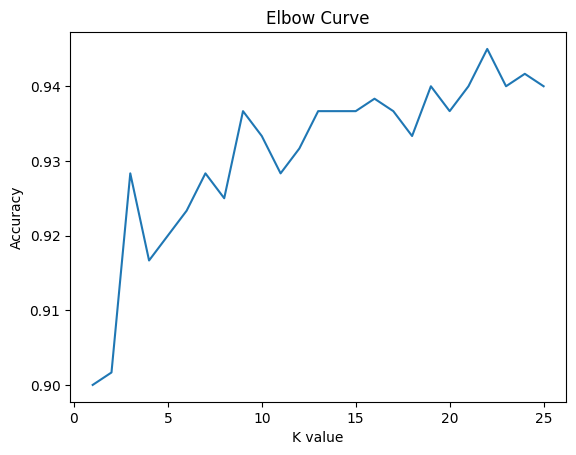

In [25]:
# plot elbow curve

plt.plot(k_range, accuracy_scores)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Elbow Curve')
plt.show()

Observing our plot we find the most stable k value to be 9 and the most accurate value to be 22. We will build 2 KNN models on these and see the confusion matrix.

---


## Two KNN models Compaired

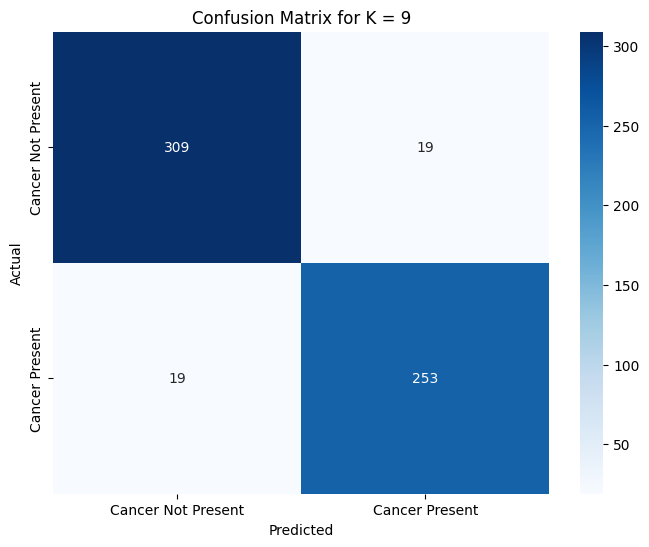

Accuracy: 0.9366666666666666
Recall: 0.9301470588235294
Precision: 0.9301470588235294
F1 score: 0.9301470588235294




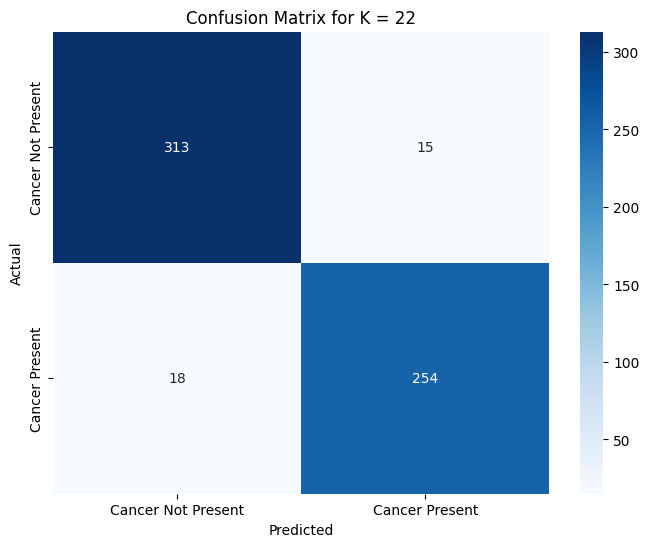

Accuracy: 0.945
Recall: 0.9338235294117647
Precision: 0.9442379182156134
F1 score: 0.9390018484288355




In [27]:
k_range = [9, 22]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cancer Not Present', 'Cancer Present'], yticklabels=['Cancer Not Present', 'Cancer Present'])
    plt

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for K = {k}')
    plt.show()
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("F1 score:", f1_score(y_test, y_pred))
    print("\n")


---

# Comparing with Logistic regression

In [28]:
# building a logistic model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)

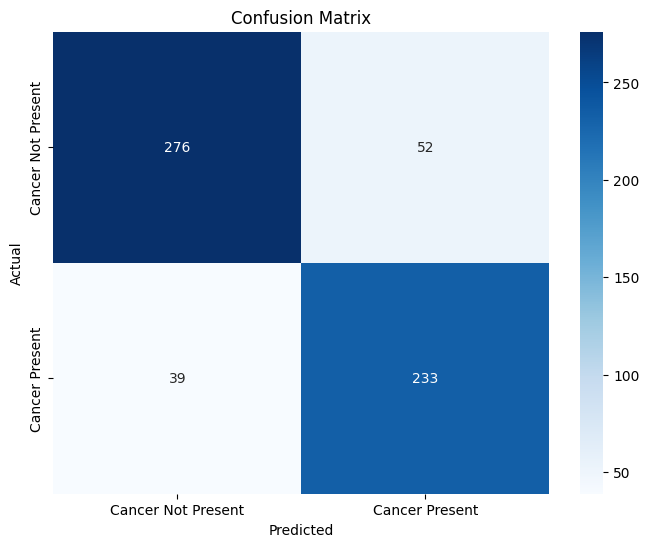

Accuracy: 0.8483333333333334
Recall: 0.8566176470588235
Precision: 0.8175438596491228
F1 score: 0.8366247755834829


In [29]:
# confusion matrix, precision, recall, accuracy and f1 score
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cancer Not Present', 'Cancer Present'], yticklabels=['Cancer Not Present', 'Cancer Present'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("F1 score:", f1_score(y_test, pred))


<Axes: >

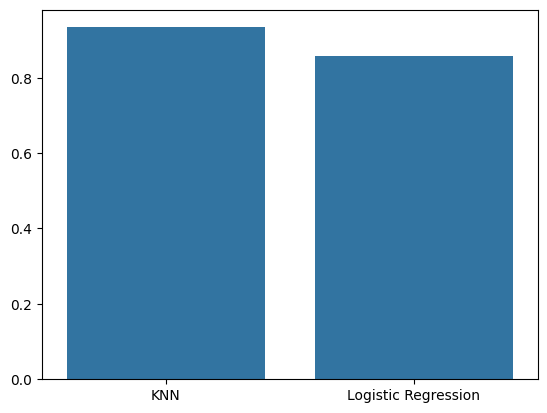

In [32]:
# comparing logistic regression vs knn k = 22 with a bar chart
sns.barplot(x=['KNN', 'Logistic Regression'], y=[recall_score(y_test, y_pred), recall_score(y_test, pred)])


## Findings
Knn has shown to perform better for our dataset in both accuracy and recall.
- When k = 22:  
Accuracy: 0.945

  Recall: 0.9338235294117647
- While Logistic:

  Accuracy: 0.8483333333333334

  Recall: 0.8566176470588235

---

# Conclusion

Our KNN model demonstrates strong performance in accurately classifying cancer patients, indicating its effectiveness in identifying cancerous cases based on patients' genomic data. This suggests its potential use as a supportive tool in early cancer detection and diagnosis.